Benny Cohen

6/28/2020


DAV Project 1

In this notebook we will be exploring a dataset about wines given to us as part of the DAV 6150 course at the Katz School.
We will prepare the data for input to a machine learning model.

Afterwards, we will look into predicting the number of cases each wine sold. 
We will train our data with several regression models, compare the models, then finally predict on a new test dataset. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
username = 'cohenb51'
path = 'Katz_School/master/DAV6150/m3/M3_Data.csv'
df = pd.read_csv(f'https://raw.githubusercontent.com/{username}/{path}')

In [3]:
df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


Each row describes stats about a specific wine. We will look at each feature individually.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
INDEX                 12795 non-null int64
TARGET                12795 non-null int64
FixedAcidity          12795 non-null float64
VolatileAcidity       12795 non-null float64
CitricAcid            12795 non-null float64
ResidualSugar         12179 non-null float64
Chlorides             12157 non-null float64
FreeSulfurDioxide     12148 non-null float64
TotalSulfurDioxide    12113 non-null float64
Density               12795 non-null float64
pH                    12400 non-null float64
Sulphates             11585 non-null float64
Alcohol               12142 non-null float64
LabelAppeal           12795 non-null int64
AcidIndex             12795 non-null int64
STARS                 9436 non-null float64
dtypes: float64(12), int64(4)
memory usage: 1.6 MB


In [5]:
df.TARGET.describe()

count    12795.000000
mean         3.029074
std          1.926368
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: TARGET, dtype: float64

We see that we have 12795 rows. Many of them contain null values. Also, they are all numeric (float, and int64). The int values are discrete and probably categorical variables.  

In [6]:
df.isnull().sum(axis=0).sum()/12795

0.6408753419304416

64 percent of our data has at least 1 null in each row! We aren't going to be able to just drop the rows with nulls.

Let's try to see what the distribution of nulls are.

In [7]:
df.isnull().sum(axis=0)/len(df)

INDEX                 0.000000
TARGET                0.000000
FixedAcidity          0.000000
VolatileAcidity       0.000000
CitricAcid            0.000000
ResidualSugar         0.048144
Chlorides             0.049863
FreeSulfurDioxide     0.050567
TotalSulfurDioxide    0.053302
Density               0.000000
pH                    0.030871
Sulphates             0.094568
Alcohol               0.051036
LabelAppeal           0.000000
AcidIndex             0.000000
STARS                 0.262524
dtype: float64

We see that most of the columns with null values are around 5 percent. The content of sulphates is high at around .09 percent. STARS (the rating each wine is given) is very high at 26 percent. Let's see if there are any columns that tend to be null at the same time. We can do this with a heatmap. 

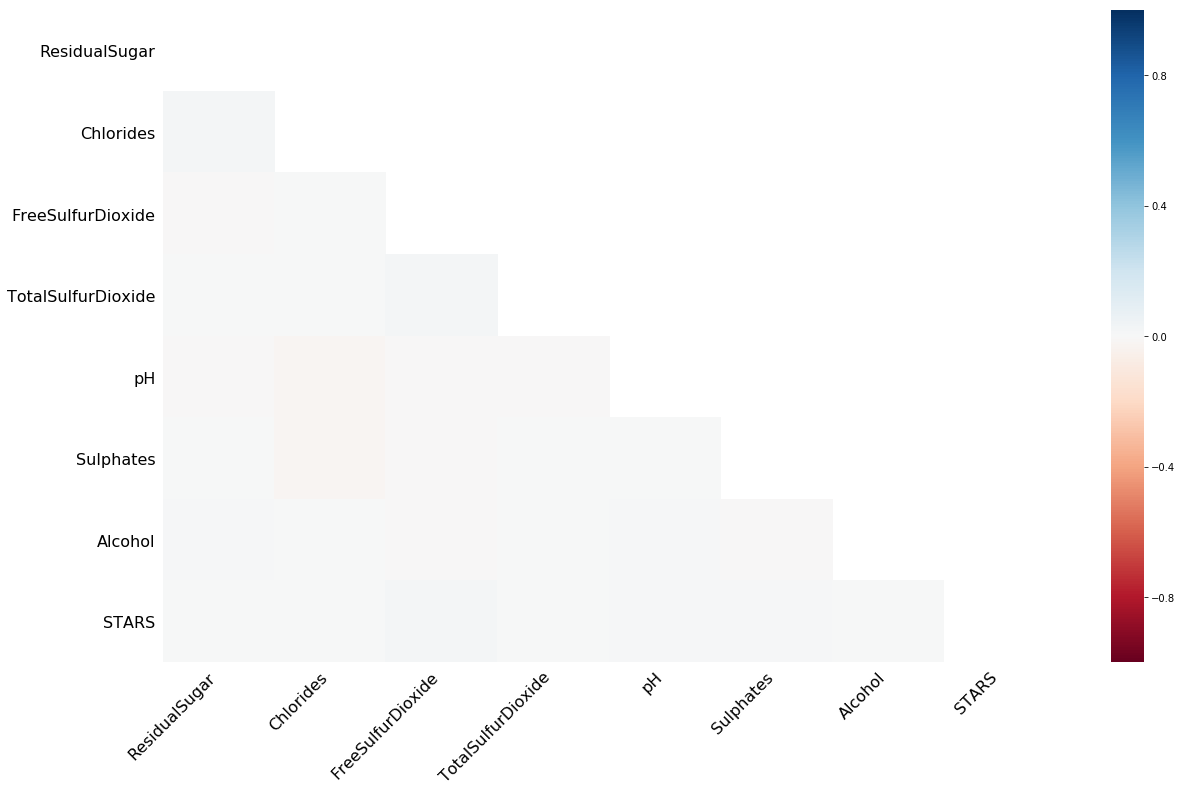

In [8]:
import missingno as msno
msno.heatmap(df) 

We read the graph as follows. On both the x axis and the y axis we have columns from our dataset. The color at the place where x and y meet measures how strongly the presence of x affects the presence of y. We see that there is no strong relationship as the graph is mainly white.

Here is a way to look at the patterns of nulls

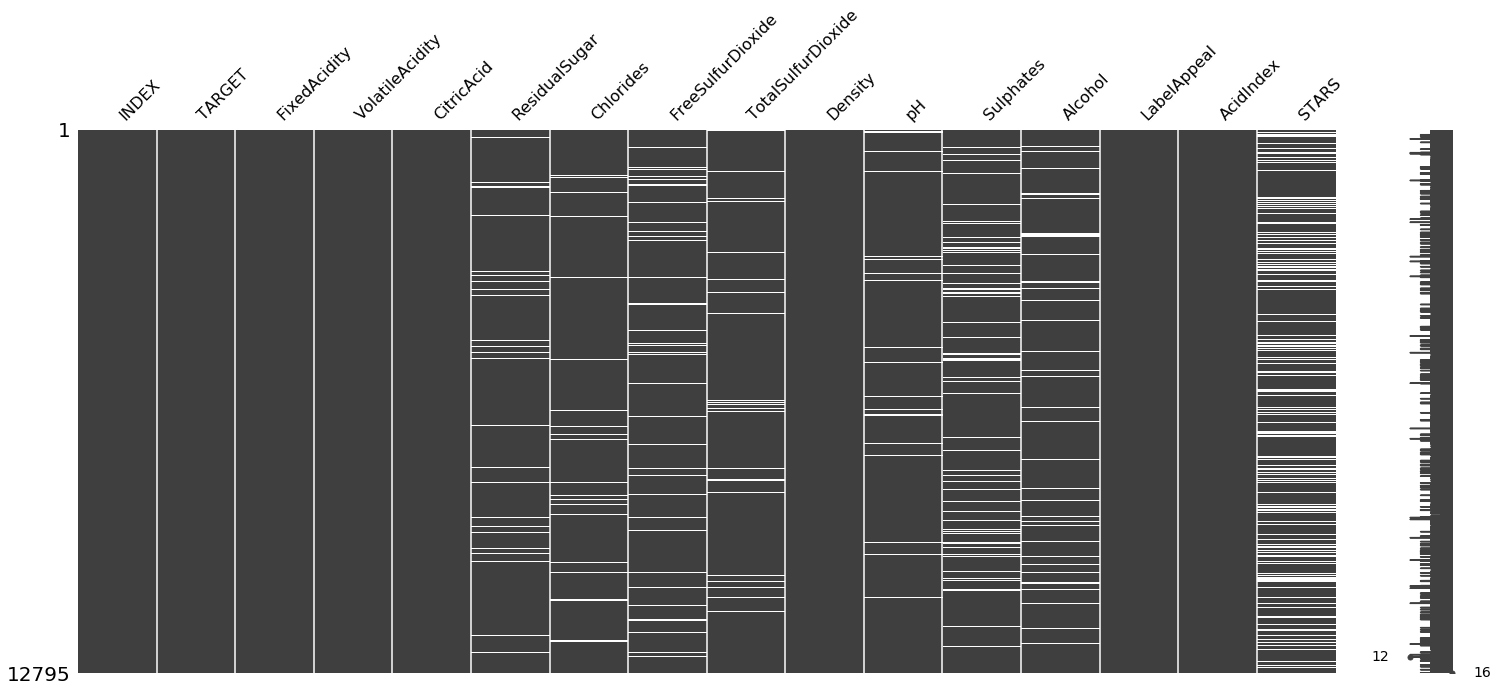

In [9]:
msno.matrix(df)

The white lines indicate where the values are null. The values are scattered around and we don't see any real patterns.

<hr>

These steps are important for us - We've shown that the null values are occurring <i>randomly</i> in our data. By random I mean there are no places where nulls occur together. This does NOT mean that there is no domain reason why the nulls have no value. We will evaluate whether our nulls could provide us any information once we better understand our features.  

Now let's look at the individual distributions. We are going to do this one feature at a time so that we can also pay attention to the scale of each graph and focus in and what each variable could possibly add to our model. 

In [10]:
df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


The index column is meaningless for us since it is just an autoincrementing number.
The Target variable (wine cases sold) has a high std. Let's see what this looks like. 

From above, we know that our target variable is a discrete integer. 

<BarContainer object of 9 artists>

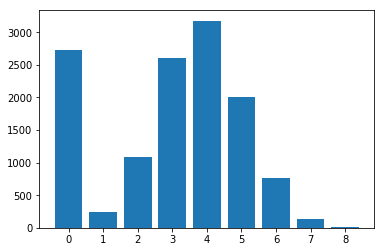

In [11]:
value_counts = df.TARGET.value_counts()
counts = value_counts.values
labels = value_counts.index
plt.bar(x = labels, height = counts, tick_label = labels)

We see that for our target variable, if you take out the wines that sold 0 cases, the distribution is approximately normal.
From this, it seems like wines that didn't sell might have some feature that prevents them from selling. Let's split our dataset and see if any of the distributions of the features change when there are 0 cases sold. 

In [12]:
dfWithNoneSold = df[df.TARGET == 0]
dfWithSold = df[~(df.TARGET == 0)]
assert len(dfWithSold) + len(dfWithNoneSold) == len(df)

In [13]:
#Just to validate the length
print(len(dfWithNoneSold))
print(len(dfWithSold))


2734
10061


We can see that a large number of wines had 0 sold.

Now let's see the overall distributions of our features; both with our split above and overall.

In [14]:
df.columns.values

array(['INDEX', 'TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide',
       'TotalSulfurDioxide', 'Density', 'pH', 'Sulphates', 'Alcohol',
       'LabelAppeal', 'AcidIndex', 'STARS'], dtype=object)

### Fixed Acidity

There are different types of acid in wines. In our dataset we have 2 <i>distinct</i> types.

1. Titratable Acids - These are acids that can be neutralized by adding a base. FixedAcidity refers to the acid that is titratable.
2. Volatile Acidity - This refers to a  different type of acidity that comes about through fermentation by spoilage organisms. It can be measured through  steam distillation.

In a practical sense, the wine consumer is interested in the Total Acidity. Wines without enough acid tend to be flat. Too much acid would make it taste tart. One feature variable that might be interesting would be the fixed acidity + the volatile acidity since these variables are additive. 

In our dataset, we won't need to engineer a new feature by adding up the acidity. Our 'AcidIndex' feature, is a weighted average of the total acidity. We should however, verify this. We won't be able to just add the variables since we aren't given the units. We therefore will relook at the acid variables after doing our cleaning steps and rescale the variables.

For more info see http://winemakersacademy.com/understanding-wine-acidity/.

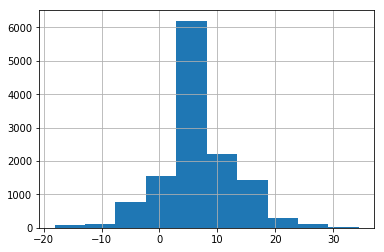

In [15]:
df.FixedAcidity.hist()

The fixed acidity (titratable acid) looks like a normal distribution but it has a very high peak. We can use a qq plot to check. We plot the quantiles from what would be a normal distribution against the distribution of the feature under test.

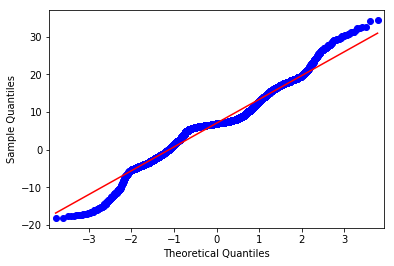

In [16]:
import statsmodels.api as sm
import pylab
sm.qqplot(df.FixedAcidity, loc = df.FixedAcidity.mean(), scale = df.FixedAcidity.std(), line='s')
pylab.show()

The tails of the graph definitely don't match up with what it would be if the distribution was normal. This is probably because the center is very narrow and there are many points far away from the center. Let's look at this another way with a box plot.

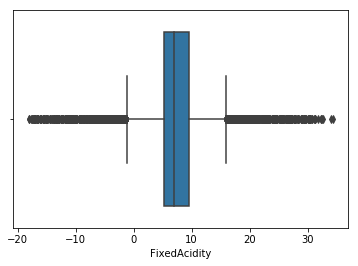

In [17]:
import seaborn as sns
sns.boxplot(df.FixedAcidity)

We can tell that there are many outliers on each side.

Let's see if the distribution changes if we look at the graph with none sold.

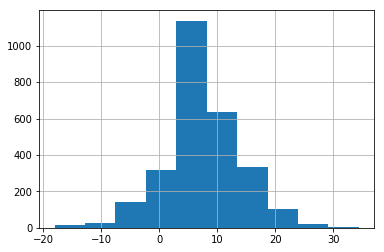

In [18]:
dfWithNoneSold.FixedAcidity.hist()

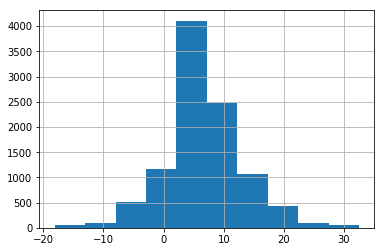

In [19]:
dfWithSold.FixedAcidity.hist()

There is no apparent difference between both of these graphs.

We have to ask here... what does it mean for FixedAcidity to be negative. It seems like this data was already transformed in some way. As mentioned before, we do not have the units this is measured in.

### Citric Acid

Citric Acid is used to add a citric taste to wine and impart freshness. Let's look at it's distribution.

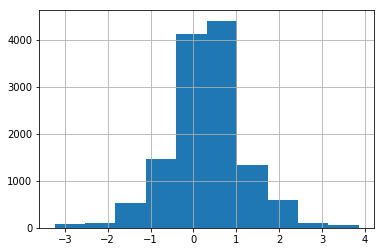

In [20]:
df.CitricAcid.hist()

We notice the distribution of citric acid is similar to fixed acidity. The distribution is normal and centered around 0.

In order to conserve space, I will not be re-graphing each distribution with the split we made above, unless there is something significant. Here once again, there is no difference between ones with 0 sold and once with at least one sold. 

### Residual Sugar

Sugar is what is used to add sweetness to wine. There is an important balance between the sweetness of the wine and the acidity of the wine. We may be interested in an interaction feature between total acidity (ie - Acid Index) and sugar. 

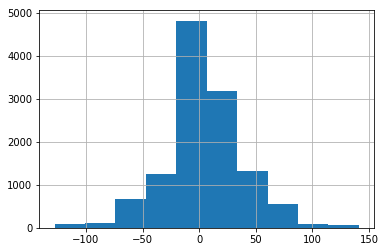

In [21]:
df.ResidualSugar.hist()

Once again we have a normal distribution, centered around 0. We have negative values making it seem like this feature also was engineered already in some way.

### Chlorides

Chlorides are another element in wine. 

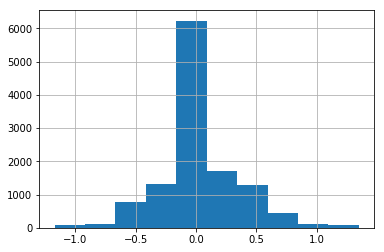

In [22]:
df.Chlorides.hist()

Liked fixed acidity, the distribution for citric acid makes a sharp peak.

We are starting to notice a trend that all of these variables make normal distributions centered around 0 with sharp peaks. The deviation here is a lot less than some of the other variables.

### FreeSulfurDioxide

Sulfur is used to keep wine fresh.

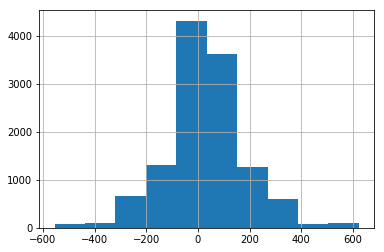

In [23]:
df.FreeSulfurDioxide.hist()

The variance for this variable is very large compared to some of the others. There are values up to around += 600. This meets the trend again of a unimodal distribution with a lot of outliers.

### Density

Density meassures the thickness of a liquid.This feature can help show the ratio between some of our features. 
As a rule of thumb- Alcohol + Sugar + Water = Density

For more info see https://www.chemwine.com/home/why-is-wine-density-important-1-sl6yl


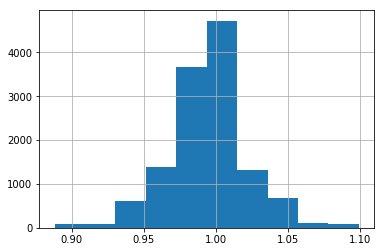

In [24]:
df.Density.hist()

The density values all hover around 1 unlike the others which are around 0. This is logical though since a density of 0 doesn't make any sense.

### PH

PH meassures the strength of the acid in a wine. The balance between the strengh of the acid and the acidity is important to keep in mind.

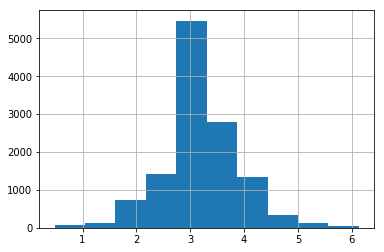

In [25]:
df.pH.hist()

We see that most wines have a low ph. Some of these ph's seem dangerously low though... Let's explore this a bit further.

In [26]:
lowph = df[df.pH <= 2]
len(lowph)

499

499 wines have a ph of 2

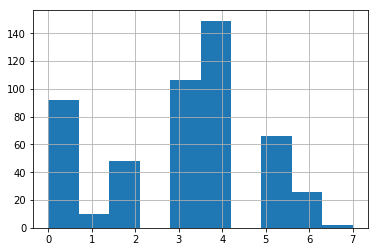

In [27]:
lowph.TARGET.hist()

Interestingly,  the distribution of the target variable does not seem to change so much for a low ph.(granted there are only ~500 samples.)

### Sulphates

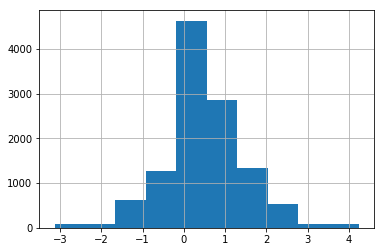

In [28]:
df.Sulphates.hist()

Once again, we see a distribution centered around 0

### Alcohol

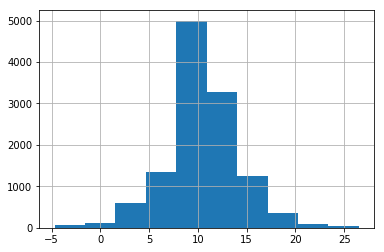

In [29]:
df.Alcohol.hist()

Here we see the alcohol content. This is normally distributed too. We can guess here the units are percentages. (Again though, how can a percentage be negative?) 

### Label Appeal

This feature is much different than the other variables in that it does not measure the quantity of anything in the wine, but rather the appeal the label on the bottle has. This feature may be particularly important in evaluating how well a bottle sells.

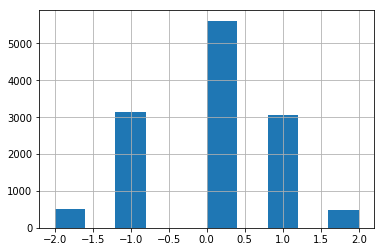

In [30]:
df.LabelAppeal.hist()

This is a discrete normal distribution.

### Acid Index

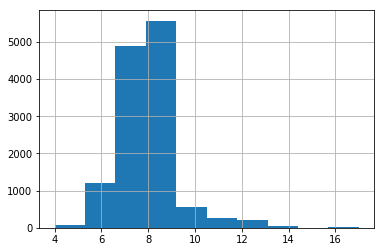

In [31]:
df.AcidIndex.hist()

This distribution is a bit different than the others in that it seems to be a bit more righly skewed. Remember though - acid index is a composite of some of our features. 

### STARS

STARS gives the rating wine experts gave on wine. We already saw that a lot of these values are null. 

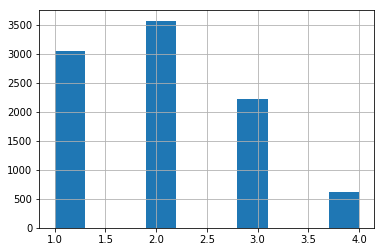

In [32]:
df.STARS.hist()

The distribution of rating is discrete. Most wines are rated poorly (1 or 2). The rest are rated medium or high (3 or 4).

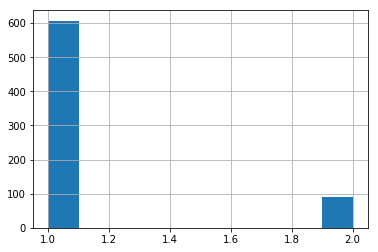

In [33]:
dfWithNoneSold.STARS.hist()

With this variable we notice a significant difference in the ratings with none sold. (albeit again the low sample size).Among the ones with none sold, all the ratings were either a 1 or 2. 

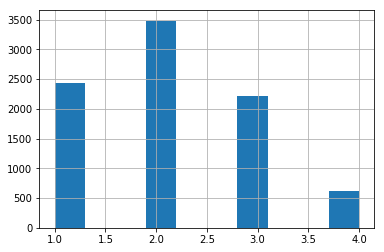

In [34]:
dfWithSold.STARS.hist()

The ones that had sold though follow the same distribution.

<hr>

This piece of the analysis is significant. We just discovered that the ratings which are null are more likely to be part of the group that did not sell any.

Let's calculate a stat to try to prove this.

In [35]:
nullRatings = df[df.STARS.isnull()]

In [36]:
counts = nullRatings.TARGET.value_counts()
counts

0    2038
3     457
2     335
4     260
1     126
5     101
6      32
7       8
8       2
Name: TARGET, dtype: int64

In [37]:
counts[0]/len(dfWithNoneSold)

0.745427944403804

A whopping .745 percent of our data with no ratings had 0 cases sold!

It is particularly important that we do NOT drop these values from our dataset.

<hr>

### Correlations

We should look to see if we can find any correlations. We may not find anything significant simply because all of our variables are being measured on different scales. Remember, some of our variables are calculated ratios between other variables (ex - fixed acididty and density)

In [38]:
import seaborn as sns

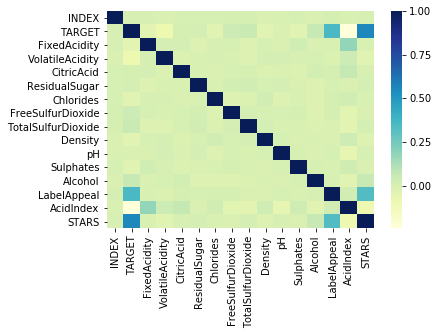

In [39]:
corr = df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu")

In this heatmap, the darker the color, the higher the correlation. We see the correlation that we found earlier in our eda between number of cases sold (TARGET) and STARS is particularly high. Our analysis was slightly limited over there to focus on null values. Here we see the non nulls are also related. Our target variable also has a not insignificant relationship with label appeal, although label appeal itself is related to STARS. The other variables seem to be independent.

Let's also try to see if there is any relationship between Sulphate being null and the target variable since a high number of sulphates were null.

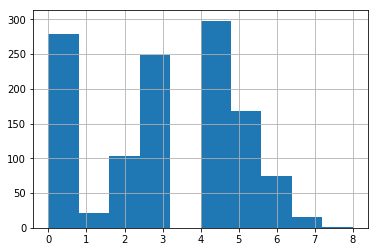

In [40]:
nullSulphates = df[df.Sulphates.isnull()]
nullSulphates.TARGET.hist()

We see no apparent difference in the number of cases sold. Now let's see if there is any correlation between any attributes where these are null.

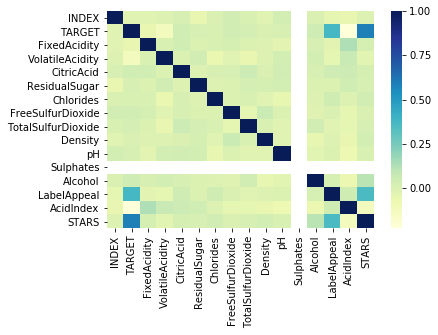

In [41]:
corr = nullSulphates.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu")

We don't see any new correlations in this narrowed down set.

### Conclusions from our eda work and next steps. 

1. Most of our variables have pdfs that are approximately normal, although they have higher peaks and more outliers. For some of them, it seems like the variables were already processed in some way to make them normal.
2. Some of our variables have values that are nonsensical. It is hard to see exactly what the given numbers represent because there are no units given. We saw some negative values for features that are measuring the content of something in the wine, which inherently can't be negative. I'm not really sure if all machine learning models can deal with negatives and I think I should get rid of them just in case. A simply way to do this would be to add a constant as that would not change the distribution; only shift it over. I do not think that negatives are meaningless for us just they were scaled improperly.
3. Our variables are measured on different scales. This in some sense limits our EDA because we couldn't add features together.
4. We did not see any apparent pattern in where nulls occur together. Most of the features with nulls comprise of under 5 percent of the data. At the same time there is a strong relationship between STARS which has close to 2700 null values and the Target variable (number of cases sold) being 0. For the variables that compose of under 10 percent of our data, because they form somewhat normal distribution, we would not be adding that much noise by simply imputing with the median. According to the feature engineering book this is fine to do up to ~20 percent of the data and this is half of that. For STARS, we should fill in null variables with an indicator variables. We should be sure to check that our distributions don't change after imputing the data.
5. We should also think about how we can incorporate new features. Since we know that acid index creates a tangible difference in the taste in the wine as it measures the total acidity, we should bin outliers into groups of very high acid index, normal acid index, and low acid index. We also should incorporate a feature that measures the ratio between sugar and acid since that also dramatically can change how sweet or tart a wine tastes.  


### Data Cleaning

Now let's scale our variables with Min max scaling. This will put our variables on the same scale so they all will have equal weight. One thing we need to pay attention to are the outliers. We have already seen that the particularly high values may give thresholds that can change the taste of the wine. 

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler(copy=True)
cleaningDf3 = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
cleaningDf3.STARS = df.STARS #since our data set is small it is fine to just undo setting these values. These are categorical values really since they are ratings. 
cleaningDf3.LabelAppeal = df.LabelAppeal

Now let's deal with the nulls.

In [44]:
cleaningDf3.isnull().sum(axis=0)/len(df)

INDEX                 0.000000
TARGET                0.000000
FixedAcidity          0.000000
VolatileAcidity       0.000000
CitricAcid            0.000000
ResidualSugar         0.048144
Chlorides             0.049863
FreeSulfurDioxide     0.050567
TotalSulfurDioxide    0.053302
Density               0.000000
pH                    0.030871
Sulphates             0.094568
Alcohol               0.051036
LabelAppeal           0.000000
AcidIndex             0.000000
STARS                 0.262524
dtype: float64

We are simply going to impute the variables which have under ~ 6 percent missing with the median. We use the median, because we know that there are many outliers from how wide the graphs were. This really should be mitigated slightly because we have already applied min max scaling.

In [45]:
counts = cleaningDf3.isnull().sum(axis=0)/len(df)
imputeWithMedianThreshold = .11

for col, percentNull in counts.iteritems():
    if percentNull <= imputeWithMedianThreshold and percentNull > 0:
        med = cleaningDf3[col].median()
        print(col, med)
        nulls = cleaningDf3[cleaningDf3[col].isnull()]
        cleaningDf3.loc[nulls.index, col] = med
        
    

ResidualSugar 0.4896820970440602
Chlorides 0.48255352894528153
FreeSulfurDioxide 0.4966044142614601
TotalSulfurDioxide 0.5031914893617021
pH 0.4814159292035398
Sulphates 0.4925373134328358
Alcohol 0.48397435897435903


In [46]:
#TO validate
cleaningDf3.isnull().sum(axis=0)/len(df)

INDEX                 0.000000
TARGET                0.000000
FixedAcidity          0.000000
VolatileAcidity       0.000000
CitricAcid            0.000000
ResidualSugar         0.000000
Chlorides             0.000000
FreeSulfurDioxide     0.000000
TotalSulfurDioxide    0.000000
Density               0.000000
pH                    0.000000
Sulphates             0.000000
Alcohol               0.000000
LabelAppeal           0.000000
AcidIndex             0.000000
STARS                 0.262524
dtype: float64

Now let's mark STARS with an indicator variable since we know those values are important as discussed earlier. It is natural here that a 0 should indicate no review.

In [47]:
cleaningDf3.STARS.value_counts()

2.0    3570
1.0    3042
3.0    2212
4.0     612
Name: STARS, dtype: int64

In [48]:
nulls = cleaningDf3[cleaningDf3.STARS.isnull()]
cleaningDf3.loc[nulls.index, 'STARS'] = 0

In [49]:
cleaningDf3.isnull().sum(axis=0)/len(df)

INDEX                 0.0
TARGET                0.0
FixedAcidity          0.0
VolatileAcidity       0.0
CitricAcid            0.0
ResidualSugar         0.0
Chlorides             0.0
FreeSulfurDioxide     0.0
TotalSulfurDioxide    0.0
Density               0.0
pH                    0.0
Sulphates             0.0
Alcohol               0.0
LabelAppeal           0.0
AcidIndex             0.0
STARS                 0.0
dtype: float64

Great! we cleaned up all the nulls.

Let's now build 2 variables.
1. The ratio of sugar to to acid index as the can meassure the sweetness/tartness of the wine. 
2. Bin the wines which have a high acid index.

Let's add  a small number to CleningDf3.ResidualSugar temporarily so as not to cause a divide by 0 exception.

In [50]:
tmpDf = cleaningDf3.ResidualSugar + .0001

In [51]:
cleaningDf3['AcidToSugarRatio'] = cleaningDf3.FixedAcidity/tmpDf
cleaningDf3.AcidToSugarRatio.isnull().any()

False

In [52]:
std = cleaningDf3.AcidIndex.std()
mean = cleaningDf3.AcidIndex.mean()

def dev(x, mean, std):
    return (x - mean)/std
    
cleaningDf3['AcidBins'] = cleaningDf3.AcidIndex.apply(lambda x: 0 if dev(x,mean,std) < -2 else 2 if dev(x, mean, std) > 2 else 1  )

In [53]:
cleaningDf3.AcidBins.value_counts()

1    12195
2      522
0       78
Name: AcidBins, dtype: int64

We see from this that around 522 have a deviation above 2 which isn't as many as we may have expected... This is a very sparse column and this probably wasn't a good idea. Let's widen the range a bit.

In [54]:
cleaningDf3['AcidBins'] = cleaningDf3.AcidIndex.apply(lambda x: 0 if dev(x,mean,std) < -1.0 else 2 if dev(x, mean, std) > 1.0 else 1  )

In [55]:
cleaningDf3.AcidBins.value_counts()

1    10447
0     1275
2     1073
Name: AcidBins, dtype: int64

This is better. 0 is a low acid,1 is normal, 2 is high.

Note that we do not want to use one hot encoding for this variable or STARS or LabelAppeal because these have an ordering to them. We would lose that data by splitting them. We don't need to use an Ordinal Encoder https://docs.w3cub.com/scikit_learn/modules/generated/sklearn.preprocessing.ordinalencoder/ because our data is already ordered as integers.

## EDA Revisiting

Let's now revisit our eda.

In [56]:
cleanedData = cleaningDf3

In [57]:
cleanedData.isnull().any()

INDEX                 False
TARGET                False
FixedAcidity          False
VolatileAcidity       False
CitricAcid            False
ResidualSugar         False
Chlorides             False
FreeSulfurDioxide     False
TotalSulfurDioxide    False
Density               False
pH                    False
Sulphates             False
Alcohol               False
LabelAppeal           False
AcidIndex             False
STARS                 False
AcidToSugarRatio      False
AcidBins              False
dtype: bool

Our data now has no nulls.

Let's now compare our distributions.

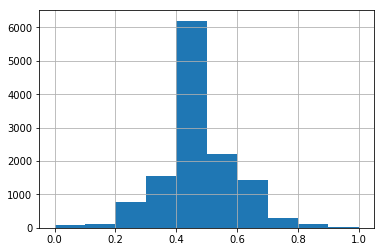

In [58]:
cleanedData.FixedAcidity.hist()

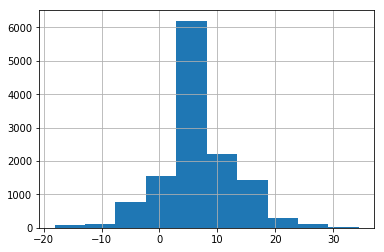

In [59]:
df.FixedAcidity.hist()

Our fixed acidity follows the same distribution. Our outliers remain intact.

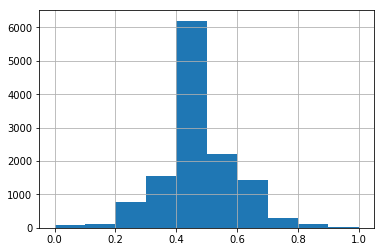

In [60]:
cleanedData.FixedAcidity.hist()


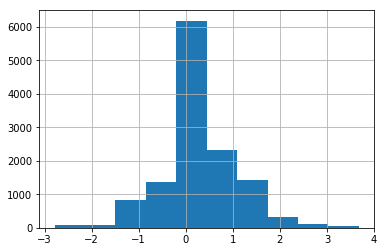

In [61]:
df.VolatileAcidity.hist()

Volatile Acidity looks the same.

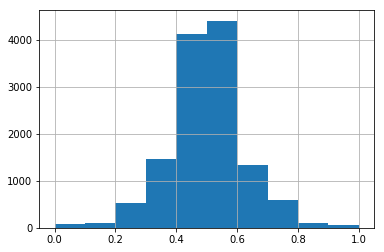

In [62]:
cleanedData.CitricAcid.hist()

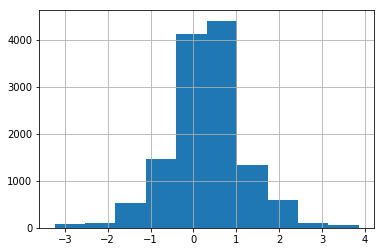

In [63]:
df.CitricAcid.hist()

Citric Acid follows the same distribution. 

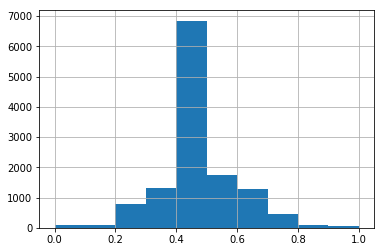

In [64]:
cleanedData.Chlorides.hist()

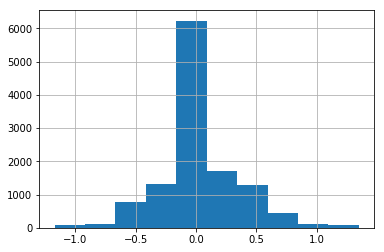

In [65]:
df.Chlorides.hist()

Chlorides follow the same distribution.

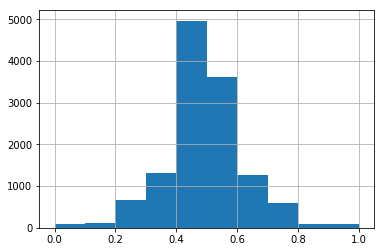

In [66]:
cleanedData.FreeSulfurDioxide.hist()

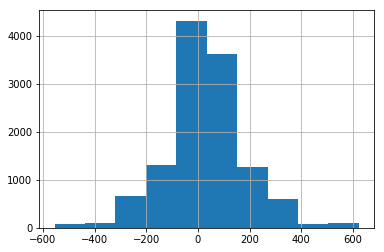

In [67]:
df.FreeSulfurDioxide.hist()

The distribution for free sulfur dioxide looks slightly different, but not significantly. (this would be hard to tell if we just plotted them all at once)

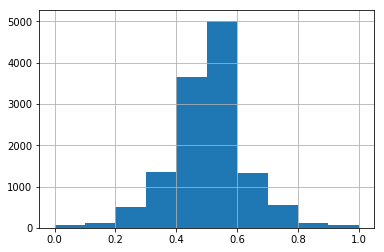

In [68]:
cleanedData.TotalSulfurDioxide.hist()

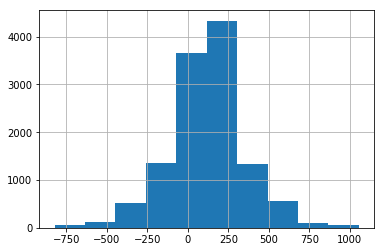

In [69]:
df.TotalSulfurDioxide.hist()

This distribution also looks slightly different but because it is so close it is fine.

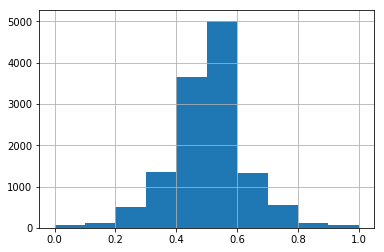

In [70]:
cleanedData.TotalSulfurDioxide.hist()

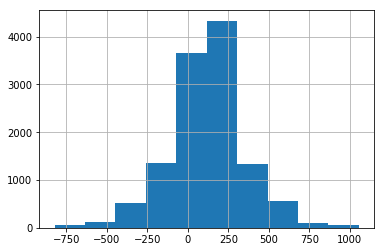

In [71]:
df.TotalSulfurDioxide.hist()

We see the same difference with sulfur dioxide.

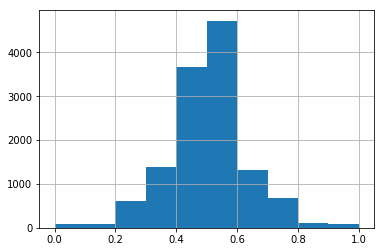

In [72]:
cleanedData.Density.hist()

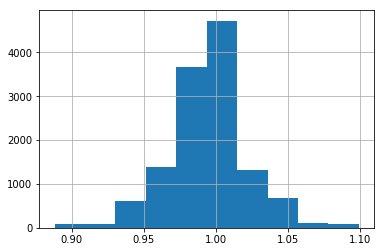

In [73]:
df.Density.hist()

Density has nearly identical distributions.

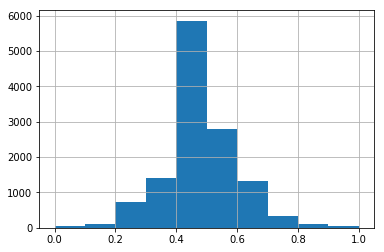

In [74]:
cleanedData.pH.hist()

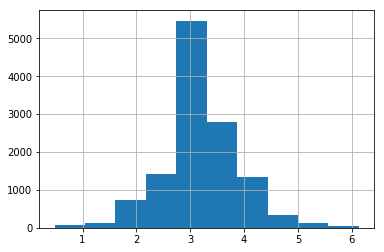

In [75]:
df.pH.hist()

ph has the same distribution.

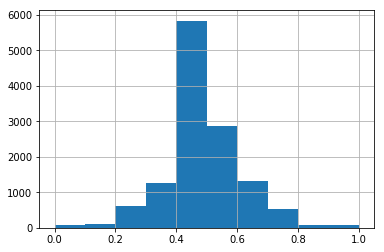

In [76]:
cleanedData.Sulphates.hist()

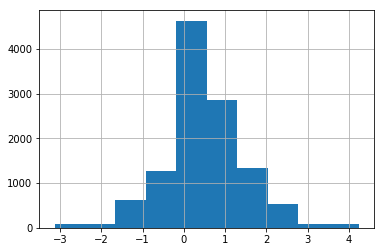

In [77]:
df.Sulphates.hist()

sulphates also has the same distribution.

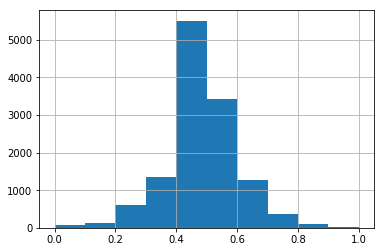

In [78]:
cleanedData.Alcohol.hist()

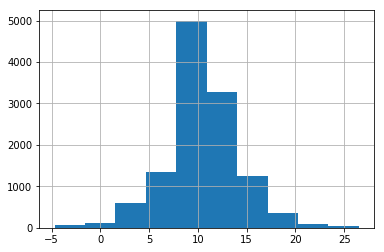

In [79]:
df.Alcohol.hist()

Alchohol has the same distribution.

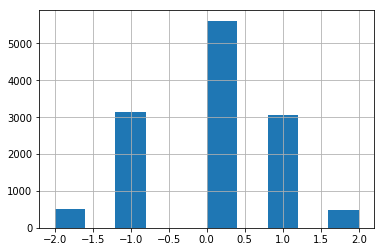

In [80]:
cleanedData.LabelAppeal.hist()

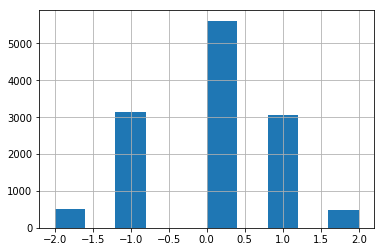

In [81]:
df.LabelAppeal.hist()

Label appeal has the same distribution.

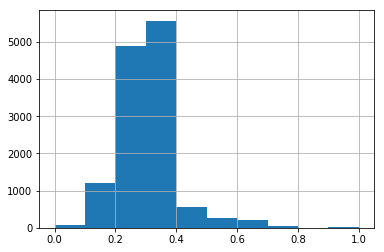

In [82]:
cleanedData.AcidIndex.hist()

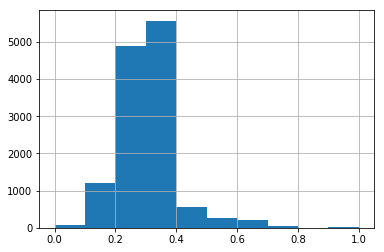

In [83]:
cleanedData.AcidIndex.hist()

Acid index has the same distribution.

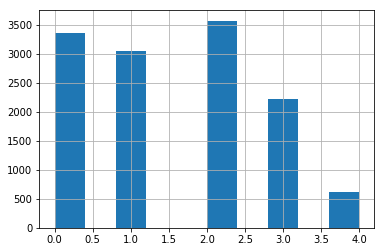

In [84]:
cleanedData.STARS.hist()

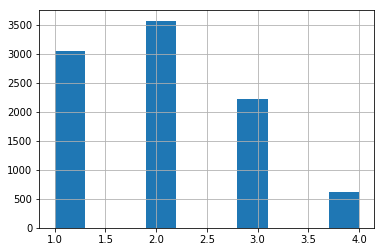

In [85]:
df.STARS.hist()

Stars has a slightly different distribution. This is because we filled in the null values with 0. We should notice an increase in our correlations now. Let's look

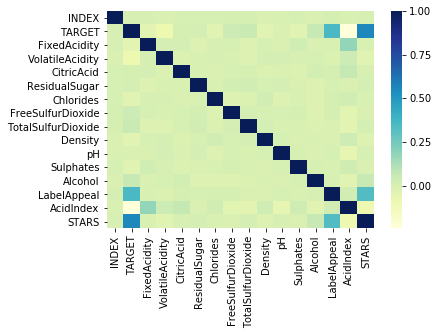

In [86]:
#First our original
corr = df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu")

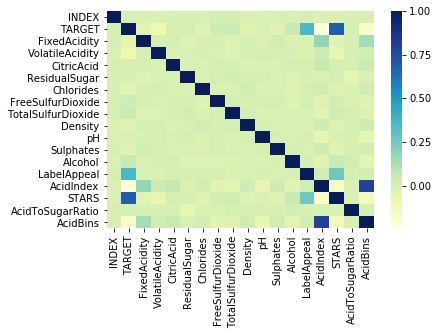

In [87]:
#Now our final
cleanedData["TARGET"] = df["TARGET"]

corr = cleanedData.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu")

We see a strong correlation between acid bins and acid index. This makes sense since acid bin was derived from acid index. Stars still has a relationship with acid index and number of cases sold (target) with Stars This relationship now, indeed is a lot stronger after filling the values in the nulls with 0.

Let's do a test to see if acid index really is the sum of the 2 types of acids

In [88]:
testAcidIndex = (cleanedData.FixedAcidity + cleanedData.VolatileAcidity)/2

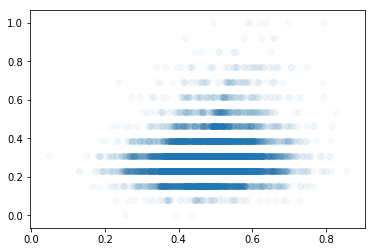

In [89]:
plt.scatter(testAcidIndex, cleanedData.AcidIndex, alpha = .03)

This doesn't seem to be completely true. The general trend is true that the more test acid, the more volatile acidity but there is a wide variance. Part of the problem may be that we don't really know how this acid index variable was calculated or if they are using extra features. These variables don't really seem additive and I'm hesitant to make a feature to add them considering that we are already given acid index.

### What we Accomplished

1. We were able to clean nulls from a dataset where over 60 percent of the rows had at least 1 null without changing the distribution
2. We saw a strong correlation between STARS, and number of boxes sold. This relationship grew stronger after adding 0 to all the null STAR records. 
3. We scaled all the columns so that all the records are between 0 and 1 (except the categorical) while keeping the outliers. 
4. We created 2 new features, the ratio of acid to sugar, and a binning of wines with extremly high acid content which can taste dramatically different.

#### Feature Selection

Since we are going to be building a regression model, let's evaluate if we have any correlated features.

Let's begin by revisiting our distributions. We want to look for columns with low variance since those won't help our model.

In [90]:
cleanedData.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS,AcidToSugarRatio,AcidBins
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000
mean,0.500309,3.029074,0.479537,0.481314,0.499776,0.495057,0.485877,0.497286,0.502040,0.502547,0.482724,0.495868,0.486689,-0.009066,0.290210,1.505744,1.508158,0.984213
std,0.288747,1.926368,0.120336,0.121177,0.121420,0.122433,0.123089,0.123010,0.120025,0.125681,0.118427,0.120352,0.116394,0.891089,0.101840,1.186538,41.316498,0.428105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250279,2.000000,0.443810,0.451314,0.460563,0.478528,0.464314,0.475382,0.455851,0.471845,0.440708,0.470828,0.442308,-1.000000,0.230769,0.000000,0.780337,1.000000
50%,0.502790,3.000000,0.476190,0.474498,0.500000,0.489682,0.482554,0.496604,0.503191,0.503907,0.481416,0.492537,0.483974,0.000000,0.307692,1.000000,0.964838,1.000000
75%,0.750589,4.000000,0.525714,0.530139,0.538028,0.530582,0.515067,0.525467,0.543085,0.532441,0.525664,0.529172,0.541667,1.000000,0.307692,2.000000,1.194055,1.000000
max,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,4.000000,4666.666667,2.000000


All of our variances are around .1. Let's revisit our correlation plot.

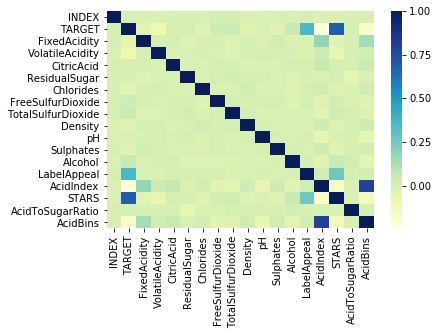

In [91]:
#Now our final
cleanedData["TARGET"] = df["TARGET"]

corr = cleanedData.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu")

Most of the relationships are weak. The only strong ones are with AcidBins and Acid index. This is expected though since AcidBins came from Acid Index. We should drop one of them when we construct our model depending on which one is more useful. The other strong relationship is with the target and STARS which is a good starting variable to create the linear model with. 


In [92]:
cleanedData = cleanedData.drop('AcidBins', axis = 1)

In [93]:
cleanedData.columns

Index(['INDEX', 'TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS', 'AcidToSugarRatio'],
      dtype='object')

I think it's justifiable not to be so concerned with reducing the dimensionality any further since we do not have that many features and the features are distinct. 

 ### Prepped Data Review

We scaled all of our variables with min max scaling. We also removed the nulls with the median and created 2 new features that could potentially help us later.

### Model Creation.

In this section we are tasked with creating 6 linear regression models. 2 Poisson regression models, 2 negative binomial regression models, and 2 multiple regression models.

Now what type of linear regression <i>should</i> we use? Let's revisit our target variable, the number of cases of wine sold.

In [94]:
df.TARGET.value_counts()

4    3177
0    2734
3    2611
5    2014
2    1091
6     765
1     244
7     142
8      17
Name: TARGET, dtype: int64

Our distribution is made up of discrete positive integers. 

In [95]:
df.TARGET.describe()

count    12795.000000
mean         3.029074
std          1.926368
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: TARGET, dtype: float64

Our mean is around 3 and our standard deviation is around 2.

More importantly though, we have a lot of zero entries. 
This may suggest a 2 stage model. 

1. Use logistic regression to predict if the value is a 0. We already established that around 74.5 of cases that were not rated (STARS) had 0 cases sold so this only seems logical.  
2. Of the remaining points, use linear regression. We don't reduce the number of rows by taking out the rows we already as 0 when predicting the model. 



We could see how our first few models do with this approach and if it doesn't work we could simply scratch this idea.

We don't need to split our data into a train and test set since we have another data set kept completely separate for test data.

In [96]:
y = df.TARGET.map(lambda x: 1 if x is 0 else 0) # Let a positive arbitratily be where a case did not
x = cleanedData[cleanedData.columns].drop('TARGET', axis= 1)

In [97]:
y.value_counts()

0    10061
1     2734
Name: TARGET, dtype: int64

In [98]:
# Let's narrow the columns we are using. to the ones with the highest correlations. 
colsWithHighCorr = ['STARS','AcidIndex', 'LabelAppeal']

In [99]:
from sklearn.linear_model import LogisticRegression 
logisticModel = LogisticRegression(C=10, solver = 'liblinear')
logisticModel.fit(x[colsWithHighCorr],y)

LogisticRegression(C=10, solver='liblinear')

In [100]:
m = logisticModel.coef_
b = logisticModel.intercept_
print(b,m)

[-0.98154421] [[-2.04382325  5.09572034  0.45337379]]


This gives us the equation of our logistic regression model. STARS has a weight of -2, AcidIndex 5, and Label Appeal .45. This means that Acid Index actually has the highest effect of whether a case sold or not.

Now let's get which rows we are going to predict as zero. 

In [101]:
arr = logisticModel.predict(x[colsWithHighCorr])
zeroPredictions = []
for i in range(len(arr)):
    if arr[i] >= .50:
        zeroPredictions.append(1)
    else:
        zeroPredictions.append(0)
        

In [102]:
ser = pd.Series(zeroPredictions)
ser.value_counts()

0    10064
1     2731
dtype: int64

In [103]:
pd.crosstab(ser,y)

TARGET,0,1
row_0,,
0,9132,932
1,929,1802


Our confusion matrix seems to be really 'accurate'...

In [104]:
import sklearn.metrics as metrics
metrics.accuracy_score(y,ser)

0.8545525595935912

A concern though is that what we were really interested in is predicting where cases had 0 cases sold. We got 1802/929 + 1802 of those cases correct. 

In [105]:
metrics.precision_score(y,ser)

0.6598315635298425

Now for our purposes we don't really care where the logistic regression model predicted 0 because our linear models are going to be predicting those. The rows that we are going to be predicting as zero cases sold are where are model predicted 1.

In [106]:
1802 / (929 + 1802)

0.6598315635298425

And as we see from our precision, only  ~66 percent of those rows are correct. 

This isn't actually that bad for us though because we actually are only predicting around 929 rows incorrectly and we can eliminate any concern we have of our target variable being zero inflated.We could compare our linear models using this prestep and without and see if this logistic regression helps us. 

It's not clear whether we can really just drop the rows because then we would be preventing our linear model from learning the trends that certain low values lead to low/high numbers. 
We could try both ways. 

In [107]:
x_unfiltered = x
y_unfilitered = df.TARGET
x_filtered = x.drop(ser[ser == 1].index)
y_filtered = df.TARGET.drop(ser[ser == 1].index)
x_filtered.shape

(10064, 16)

### Regression Models

Optimally we would expect a count model to give the most logical predictions as our distributions are made up of discrete non negative integers. We could try to fit our data to a Poisson PDF and see if that distribution could accurately predict our mode. We could also fit this to a negative binomial distribution although in our case our deviation is actually smaller than the mean so that may not be such a good choice.

We were tasked to create a multiple linear regression model first though. We might expect this to do worse, simply because this is a continuous variable. Our results might not be readily interpretable since we might get fractions and negatives.

#### Model 1

Since we are going to be creating 2 models of each type, it is logical to create one model that includes all the variables. This model could be set as a baseline to see how the model does when including all of the information it has available. Afterwards, for our second model we will train on only the significant variables. Since I am unsure at the start which features are important we will do this by removing the non significant variables. 
We will start by looking at how our model does by training on all rows without the rows from the logistic regression. 
We then will repeat with the rows from the regression and apply backwards selection on the model that does better.

In [108]:
import statsmodels.api as sm
import numpy as np

def GetModel(x, y):
    x = sm.add_constant(x)
    est = sm.OLS(np.asarray(y), x.astype(float)).fit()
    est.summary()
    return est

In [109]:
y_filtered.shape

(10064,)

In [110]:
est = GetModel(x_filtered,y_filtered)
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     626.1
Date:                Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:06:38   Log-Likelihood:                -15736.
No. Observations:               10064   AIC:                         3.151e+04
Df Residuals:                   10047   BIC:                         3.163e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5710      0.163     15.771      0.000       2.251       2.891
INDEX                  0.0712      0.040      1.776      0.076      -0.007       0.150
FixedAcidity           0.0612      0.097      0.630      0.528      -0.129       0.251
VolatileAcidity       -0.5638      0.095     -5.905      0.000      -0.751      -0.377
CitricAcid             0.0669      0.095      0.701      0.483      -0.120       0.254
ResidualSugar          0.0099      0.095      0.104      0.917      -0.176       0.196
Chlorides             -0.2091      0.094     -2.215      0.027      -0.394      -0.024
FreeSulfurDioxide      0.2695      0.094      2.878      0.004       0.086       0.453
TotalSulfurDioxide     0.1309      0.097      1.350      0.177      -0.059       0.321
Density               -0.1985      0.092     -2.159      0.031      -0.379      -0.018
pH                    -0.0390      0.098     -0.399      0.690      -0.231       0.153
Sulphates             -0.1972      0.097     -2.041      0.041      -0.387      -0.008
Alcohol                0.5677      0.099      5.716      0.000       0.373       0.762
LabelAppeal            0.6603      0.014     46.756      0.000       0.633       0.688
AcidIndex             -1.5124      0.139    -10.863      0.000      -1.785      -1.239
STARS                  0.7400      0.013     58.493      0.000       0.715       0.765
AcidToSugarRatio       0.0002      0.000      0.784      0.433      -0.000       0.001
==============================================================================
Omnibus:                     1234.241   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2005.591
Skew:                          -0.856   Prob(JB):                         0.00
Kurtosis:                       4.360   Cond. No.                         767.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our r^2 is around .5 including all the variables. We also see that AcidIndex has the highest weight of all the features. The weights themselves for this model aren't so useful because we see that we have many variables that are not significant. Our adjusted r2 is not so much lower than r2 though so this might not be such a big deal.

We need to append our results from the log regression before looking at the mse. We also need to recalculate the r2 once we do so.

In [113]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_filtered,y_filtered)
preds = model.predict(x_filtered)
preds = np.concatenate((preds,np.zeros(len(ser[ser == 1]))))
actual_values = np.concatenate((y_filtered, df.TARGET[ser[ser == 1].index]))

In [114]:
np.sqrt(metrics.mean_squared_error(actual_values, preds))

1.3980041943036428

In [115]:
metrics.r2_score(actual_values,preds)

0.4732891286464742

Once we added our results from the logistic regression, our r2 actually went down. We will try to figure why by graphing it. 

Text(0.5, 0, 'predicted')

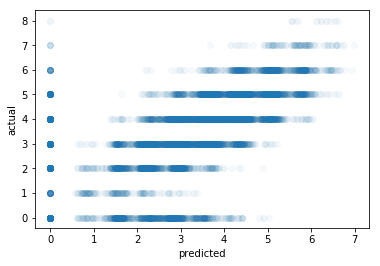

In [116]:
%matplotlib inline
plt.scatter(preds, actual_values, alpha = .03)
plt.ylabel("actual")
plt.xlabel("predicted")

We definitely see that we have a high variance. This is why our r2 is so low. 
Although the overall trend of the graph is correct, we see some predictions with 0 being predicted over 3 which is above average. We also have some negative predictions. 

This model is underfitting.

One thing that strikes about this graph is that we have a line where the model predicted zero, even when the actual value was 6 or 7. This probably stems from how the logistic regression was just rating hit or miss. 

We could make our algorithm more dynamic by letting the linear regression model overrule the logistic model if it gives a high rating. 

In [117]:
df.TARGET[ser[ser == 1].index].value_counts()

0    1802
3     332
4     231
2     182
5      99
1      44
6      31
7       8
8       2
Name: TARGET, dtype: int64

This shows the breakdown of the values of the rows that we predicted as 0. 1802 were correctly 0. Although a few were actual higher, there really weren't so many values and the graph is slightly misleading. 

Let's make our model smarter by instead of just concatenating the results of the logistic regression to actually have the ability to overrule the value. 

In [118]:
model.fit(x_filtered,y_filtered)
preds = model.predict(x_filtered)
mask = ser[ser == 1].index
predictionsOnPredictedLogisticRegressionPoints = model.predict(x.iloc[mask])
concat = []
count = 0
subcount = 0
for i in range(len(predictionsOnPredictedLogisticRegressionPoints)):
    if predictionsOnPredictedLogisticRegressionPoints[i] >= 4:
        subcount = subcount + 1
        concat.append(predictionsOnPredictedLogisticRegressionPoints[i])
    else:
        count = count +1
        concat.append(0)
preds = np.concatenate((preds,concat))

(array([  9.,  57., 168., 468., 596., 777., 420., 170.,  53.,  13.]),
 array([0.01331966, 0.42444998, 0.8355803 , 1.24671063, 1.65784095,
        2.06897127, 2.4801016 , 2.89123192, 3.30236224, 3.71349257,
        4.12462289]),
 <a list of 10 Patch objects>)

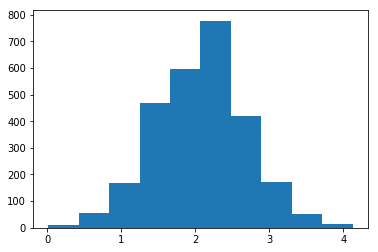

In [119]:
plt.hist(predictionsOnPredictedLogisticRegressionPoints)

The actual predictions on the the points predicted as 0 with the logistic regression are normally distributed.

In [120]:
np.sqrt(metrics.mean_squared_error(actual_values, preds))

1.3984796563872648

It is not overly surprising that our mse did not improve that much from this change as so few rows were predicted wrong when they had high values.

Now let's redo our model, but this time use all of the points instead of filtering out the rows that we filtered out with the logistic regression.

In [121]:
y = df.TARGET 
x = cleanedData[cleanedData.columns].drop('TARGET', axis= 1)

In [122]:
model.fit(x,y)
preds = model.predict(x)


In [123]:
np.sqrt(metrics.mean_squared_error(preds, y))

1.3233366749583013

When we don't intercept the results with the logistic regression we get this value for the mean squared error. This is lower than the result we got above when we trained on all the data except the ones predicted positive which is a good sign. It tells us that our predictions are closer on average.

In [124]:
metrics.r2_score(y,preds)

0.5280499559522944

Our r2 score is a bit higher. This isn't so surprising, since we trained on more data. 

Text(0.5, 0, 'predicted')

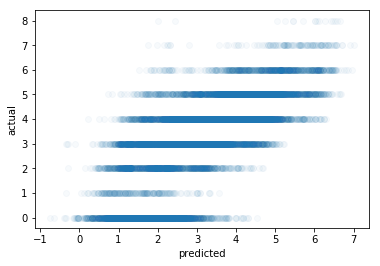

In [125]:
%matplotlib inline
plt.scatter(preds, y, alpha = .03)
plt.ylabel("actual")
plt.xlabel("predicted")

This graph is indicative of a very bad model. Although our mse is low, we seem to be predicted low values when we should be predicting high and vice versa. Let's see what happens when we plug in our logistic regression model.

In [126]:
mask = ser[ser == 1].index
preds[mask] = 0


In [127]:
np.sqrt(metrics.mean_squared_error(preds, y))

1.4192146720442422

In [128]:
metrics.r2_score(y,preds)

0.45718540265765306

Both our statistics decrease when we use our logistic regression.


Text(0.5, 0, 'predicted')

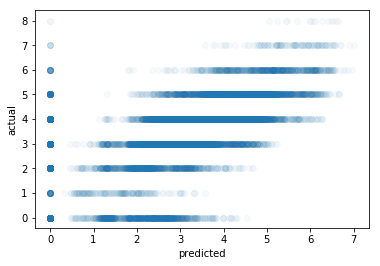

In [129]:
%matplotlib inline
plt.scatter(preds, y, alpha = .03)
plt.ylabel("actual")
plt.xlabel("predicted")

We see similar behavior as our first model where the logistic regression is making our model worse. We could construct a residual graph. 

Text(0.5, 0, 'actual')

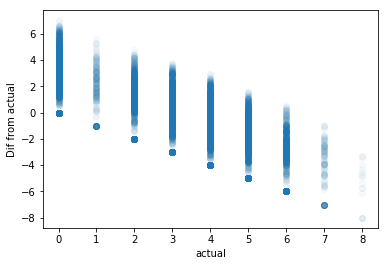

In [130]:
%matplotlib inline
plt.scatter(actual_values, preds- actual_values, alpha = .03)
plt.ylabel("Dif from actual")
plt.xlabel("actual")

This is really just another view of the same graph we have above. Because we are using our logistic regression model, the lowest predicted value is 0.
That's why if the actual value is i, we can't be more than i below the predicted value. There is no max predicted value technically, but we see our regression model is less likely to give high predictions. 

This kind of shows the problem by training on the data including all of the 0 rows. Our model will underpredict the high values. We see from the graph that once we hit where the actual value is 6, our model underpredicts the cases sold. 

We had the right idea with the first version of the model where we used the logistic regression. The problem, is that as we saw by looking at the confusion matrix, our logistic regression is not so good at predicting zeros.

We saw that our coefficient are very small because we have a lot of non significant features.

So let's try constructing the same model, without the logistic regression, AND filtering out the zero rows. When we predict we will use all of the data, but I don't want all these 0 predictions to be biasing our results so that we are always underpredicting high values.

In [228]:
tmp = cleanedData[cleanedData.columns]
noZeros = tmp[cleanedData.TARGET != 0]

In [229]:
x = noZeros.drop('TARGET', axis= 1)
y = noZeros.TARGET

In [230]:
model = GetModel(x,y)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     921.3
Date:                Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:31:04   Log-Likelihood:                -11930.
No. Observations:               10061   AIC:                         2.389e+04
Df Residuals:                   10044   BIC:                         2.402e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.3016      0.111     29.616      0.000       3.083       3.520
INDEX                  0.0055      0.027      0.199      0.842      -0.048       0.059
FixedAcidity           0.0622      0.067      0.931      0.352      -0.069       0.193
VolatileAcidity       -0.2530      0.066     -3.842      0.000      -0.382      -0.124
CitricAcid            -0.0031      0.065     -0.047      0.962      -0.131       0.125
ResidualSugar         -0.0644      0.065     -0.993      0.321      -0.191       0.063
Chlorides             -0.1723      0.065     -2.671      0.008      -0.299      -0.046
FreeSulfurDioxide      0.0921      0.064      1.438      0.150      -0.033       0.218
TotalSulfurDioxide    -0.1573      0.066     -2.378      0.017      -0.287      -0.028
Density               -0.1922      0.064     -3.027      0.002      -0.317      -0.068
pH                     0.1638      0.067      2.440      0.015       0.032       0.295
Sulphates              0.0169      0.066      0.256      0.798      -0.113       0.147
Alcohol                0.8373      0.068     12.336      0.000       0.704       0.970
LabelAppeal            0.8398      0.010     87.725      0.000       0.821       0.859
AcidIndex             -0.7464      0.095     -7.880      0.000      -0.932      -0.561
STARS                  0.3301      0.008     42.306      0.000       0.315       0.345
AcidToSugarRatio    2.075e-05      0.000      0.122      0.903      -0.000       0.000
==============================================================================
Omnibus:                      116.892   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.960
Skew:                           0.237   Prob(JB):                     4.45e-28
Kurtosis:                       3.275   Cond. No.                         766.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our r2 is higher this time... Now let's predict on the full set of x and y and compare the results.

In [134]:
x_t = tmp.drop('TARGET', axis= 1)
y_t = tmp.TARGET

In [135]:
preds = model.predict(sm.add_constant(x_t))

In [136]:
print(f'mse : {np.sqrt(metrics.mean_squared_error(preds, y_t))})')
print(f'r2: {metrics.r2_score(y_t,preds)})')

mse : 1.7146908014922186)
r2: 0.207631924135127)


Our model is doing worse without the zero rows. We might be losing too much data by removing all the zeros. 

Text(0.5, 0, 'actual')

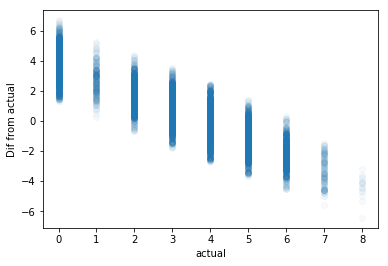

In [137]:
%matplotlib inline
plt.scatter(actual_values, preds- actual_values, alpha = .03)
plt.ylabel("Dif from actual")
plt.xlabel("actual")

We could also try undersampling from these 0 rows but as the graph above shows, the problem doesn't really seem to be with the zero rows because we are still under predicting.

#### Summary of Variants of model 1...

Model 1 was intended to be a baseline model... how we do when we make a simple regression including all of our variables. We made some interesting discoveries while doing this that we should take into account when we make our future models. 

1. The model does best when we train on all of the data, including the zero rows.
2. Using our logistic regression model makes the model perform worse. 

Let's save the version of this model where we trained it on all data so we could compare it with our other models later. 


In [138]:
y = df.TARGET 
x = cleanedData[cleanedData.columns].drop('TARGET', axis= 1)
model1 = GetModel(x,y)

### Model 2

Let's make the same type of model, just this time eliminating the non important features. This will help us interpret our coefficients. 


Here is our starting point.

In [139]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     893.6
Date:                Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:08:00   Log-Likelihood:                -21740.
No. Observations:               12795   AIC:                         4.351e+04
Df Residuals:                   12778   BIC:                         4.364e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4331      0.164     14.828      0.000       2.111       2.755
INDEX                  0.0162      0.041      0.400      0.689      -0.063       0.096
FixedAcidity          -0.0006      0.099     -0.006      0.996      -0.194       0.193
VolatileAcidity       -0.6415      0.097     -6.619      0.000      -0.832      -0.452
CitricAcid             0.1478      0.097      1.528      0.127      -0.042       0.337
ResidualSugar          0.0572      0.096      0.596      0.551      -0.131       0.245
Chlorides             -0.3124      0.095     -3.279      0.001      -0.499      -0.126
FreeSulfurDioxide      0.3716      0.095      3.898      0.000       0.185       0.559
TotalSulfurDioxide     0.4244      0.098      4.340      0.000       0.233       0.616
Density               -0.1688      0.093     -1.809      0.070      -0.352       0.014
pH                    -0.1945      0.099     -1.963      0.050      -0.389      -0.000
Sulphates             -0.2406      0.097     -2.470      0.014      -0.432      -0.050
Alcohol                0.3394      0.101      3.363      0.001       0.142       0.537
LabelAppeal            0.4325      0.014     31.639      0.000       0.406       0.459
AcidIndex             -2.7078      0.120    -22.608      0.000      -2.943      -2.473
STARS                  0.9769      0.010     93.429      0.000       0.956       0.997
AcidToSugarRatio       0.0002      0.000      0.842      0.400      -0.000       0.001
==============================================================================
Omnibus:                        6.326   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                5.971
Skew:                          -0.023   Prob(JB):                       0.0505
Kurtosis:                       2.905   Cond. No.                         673.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now remove non significant features.

In [140]:
#every columns with a p value below .1 percent
sigColumns = ['STARS', 'AcidIndex', 'LabelAppeal', 'Alcohol', 'pH', 'Density', 'TotalSulfurDioxide', 'FreeSulfurDioxide' ]

In [141]:
est = GetModel(x[sigColumns],y)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1771.
Date:                Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:08:00   Log-Likelihood:                -21772.
No. Observations:               12795   AIC:                         4.356e+04
Df Residuals:                   12786   BIC:                         4.363e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.9602      0.118     16.677      0.000       1.730       2.191
STARS                  0.9820      0.010     93.924      0.000       0.962       1.003
AcidIndex             -2.7382      0.118    -23.245      0.000      -2.969      -2.507
LabelAppeal            0.4322      0.014     31.555      0.000       0.405       0.459
Alcohol                0.3410      0.101      3.374      0.001       0.143       0.539
pH                    -0.2008      0.099     -2.023      0.043      -0.395      -0.006
Density               -0.1829      0.093     -1.956      0.050      -0.366       0.000
TotalSulfurDioxide     0.4443      0.098      4.537      0.000       0.252       0.636
FreeSulfurDioxide      0.3792      0.095      3.970      0.000       0.192       0.566
==============================================================================
Omnibus:                        7.285   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.818
Skew:                          -0.024   Prob(JB):                       0.0331
Kurtosis:                       2.898   Cond. No.                         31.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Although the r2 for this model is slightly lower, all of our features now have a low p value (less than .05). This tells us the chance that the variable has a coefficient of 0 and isn't contributing anything is very low. This makes our coefficients more accurate as their weight won't be impacted by noisy features.

Once again, we see that Acid Index has the strongest relationship with a coefficient of -2.7. This tells us that Acid Index contributes most to the number of sales. This seems odd though since the Stars actually has a stronger correlation.

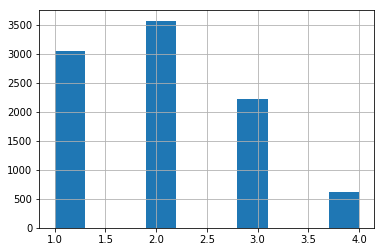

In [142]:
df.STARS.hist()

One problem may be that this variable hasn't been scaled like the others. We could try scaling it then remaking the model. 

In [143]:
scaler = MinMaxScaler(copy=True)
x.STARS = scaler.fit_transform(np.array(list(x.STARS)).reshape(-1, 1))

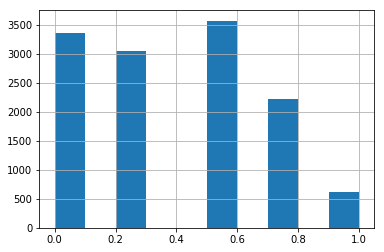

In [144]:
x.STARS.hist()

The overall shape is the same.

In [145]:
est = GetModel(x[sigColumns],y)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1771.
Date:                Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:08:02   Log-Likelihood:                -21772.
No. Observations:               12795   AIC:                         4.356e+04
Df Residuals:                   12786   BIC:                         4.363e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.9602      0.118     16.677      0.000       1.730       2.191
STARS                  3.9281      0.042     93.924      0.000       3.846       4.010
AcidIndex             -2.7382      0.118    -23.245      0.000      -2.969      -2.507
LabelAppeal            0.4322      0.014     31.555      0.000       0.405       0.459
Alcohol                0.3410      0.101      3.374      0.001       0.143       0.539
pH                    -0.2008      0.099     -2.023      0.043      -0.395      -0.006
Density               -0.1829      0.093     -1.956      0.050      -0.366       0.000
TotalSulfurDioxide     0.4443      0.098      4.537      0.000       0.252       0.636
FreeSulfurDioxide      0.3792      0.095      3.970      0.000       0.192       0.566
==============================================================================
Omnibus:                        7.285   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.818
Skew:                          -0.024   Prob(JB):                       0.0331
Kurtosis:                       2.898   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Practically, we didn't really 'gain' anything by doing this. Most of our stats remain the same. Our Stars coefficient can now be compared to acidindex though. We see that stars actually has higher weight the acid index, just stars had a lower coefficient because it was on a different scale. All of the other stats remain the same after this transformation. 

The stats from this model like the previous show some problems. We have a high with the high aic and bic. Also our log likelihood is very low. We will go more into these numbers at the end when we compare our models. \


In [146]:
preds = est.predict(sm.add_constant(x[sigColumns]))

In [147]:
np.sqrt(metrics.mean_squared_error(y,preds))

1.3266864418843547

Our rmse is around 1.3. This is almost identical to what we had in the first model. There really is no reason to consider using the first model since the barells aren't meaningful in the first model. It is true that the first model is has a slightly higher r2 but it is very small.

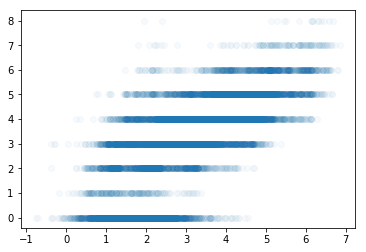

In [148]:
plt.scatter(preds, y, alpha = .03)

Once again we can see how there is a lot of variance We also see a few negative predictions which don't really make sense. Using the logistic may help a bit with this but we saw that it performs worse. We have fractional predictions but I think that is ok for this since our prediction can be read as saying on average how many cases of wine will be sold. 

Once again we seem to be underpredicting high values.

Let's save our model to do our comparison at the end.

In [149]:
model2 = est

### Model 3

Let's now try a poisson model. This is a count distribution so we may expect it to do better. However, our data doesn't really fit a poisson as we saw earlier since the mean is not equal to the variance and we have a lot of zeros.

In [150]:
import statsmodels.api as sm 
count_model = sm.GLM(y, sm.add_constant(x), family=sm.families.Poisson(sm.genmod.families.links.log)).fit()

In [151]:
print(count_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12778
Model Family:                 Poisson   Df Model:                           16
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23335.
Date:                Sun, 28 Jun 2020   Deviance:                       14727.
Time:                        10:08:05   Pearson chi2:                 1.09e+04
No. Iterations:                     5   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9216      0.072     12.848      0.000       0.781       1.062
INDEX                  0.006

At first glance from these numbers we know that our model is not going to perform so well. We have a very high Deviance and Person chi2. 

In [152]:
preds = count_model.predict(sm.add_constant(x))

In [153]:
np.sqrt(metrics.mean_squared_error(preds,y))

1.403984616604893

Our rmse is higher than the linear model. Let's see if we try to use the logistic model to predict rows. 

In [154]:
preds[mask] = 0

In [155]:
np.sqrt(metrics.mean_squared_error(preds,y))

1.4880146938824632

Once again, we see our logistic regression makes the model worse. 

Let's see what we can get if we plot the results.

Text(0.5, 0, 'predicted')

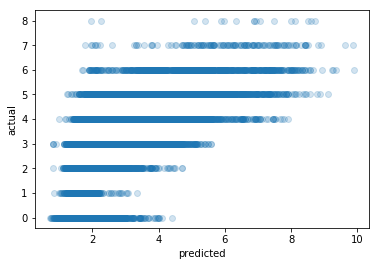

In [156]:
preds = count_model.predict(sm.add_constant(x))
plt.scatter(preds, y, alpha = .2)
plt.ylabel("actual")
plt.xlabel("predicted")

We see that the bands are a lot longer showing that there is a higher variance.

At the same time, the deviation for low values seems to be somewhat lower. 

In [157]:
metrics.r2_score(y, preds)

0.4687731322930313

Our r2 score inspite of the low variation around 0,1,and 2 is lower. 

In order to compare the coefficient with our linear model, lets recreate this model but filter out the non significant columns. 

In [158]:
sigCols = ['STARS', 'AcidIndex', 'LabelAppeal', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Chlorides', 'VolatileAcidity' ]

In [159]:
import statsmodels.api as sm 
count_model = sm.GLM(y, sm.add_constant(x[sigCols]), family=sm.families.Poisson(sm.genmod.families.links.log)).fit()

In [160]:
preds = count_model.predict(sm.add_constant(x[sigCols]))
np.sqrt(metrics.mean_squared_error(preds,y))

1.4046075354962388

Our mse is around the same.

In [161]:
count_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12787
Model Family:                 Poisson   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23343.
Date:                Sun, 28 Jun 2020   Deviance:                       14744.
Time:                        10:08:09   Pearson chi2:                 1.09e+04
No. Iterations:                     5   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8700      0.046     18.781      0.000       0.779       0.961
STARS                  1.2494      0.018     69.132      0.000       1.214       1.285
AcidIndex             -1.1320      0.058    -19.467      0.000      -1.246      -1.018
LabelAppeal            0.1329      0.006     21.919      0.000       0.121       0.145
FreeSulfurDioxide      0.1455      0.041      3.518      0.000       0.064       0.227
TotalSulfurDioxide     0.1542      0.043      3.609      0.000       0.070       0.238
Chlorides             -0.1058      0.041     -2.551      0.011      -0.187      -0.025
VolatileAcidity       -0.2186      0.042     -5.186      0.000      -0.301      -0.136
======================================================================================
"""

The constants in this model seem to be smaller. Stars in the linear model for example has a coefficient around 4 and in this model it is around 1.3. 
The trend though of STARS and AcidIndex having the highest weight remains.

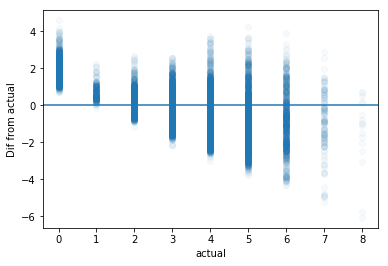

In [162]:
%matplotlib inline
plt.scatter(y, preds- y, alpha = .03)
plt.ylabel("Dif from actual")
plt.xlabel("actual")
plt.axhline()

This graph shows we aren't under predicting values as much. We are overpredicting the low values though.

In [163]:
model3 = est

### Model 4

Let's try a zero inflated poisson now in lieu of our logistic regression step in our model using the significant columns.

We may expect this to do better as we have a lot of 0s.

In [164]:
import statsmodels.discrete.count_model as reg_models
x.columns

Index(['INDEX', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS', 'AcidToSugarRatio'],
      dtype='object')

In [165]:
out=reg_models.ZeroInflatedPoisson(y,x[sigCols],x[sigCols], inflation='logit')
fit_regularized=out.fit()

C:\Users\b-coh\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 1.630339
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


C:\Users\b-coh\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [166]:
fit_regularized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                  TARGET   No. Observations:                12795
Model:             ZeroInflatedPoisson   Df Residuals:                    12788
Method:                            MLE   Df Model:                            6
Date:                 Sun, 28 Jun 2020   Pseudo R-squ.:                  0.1485
Time:                         10:08:13   Log-Likelihood:                -20860.
converged:                       False   LL-Null:                       -24497.
                                         LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
inflate_STARS                 -9.8295      0.250    -39.289      0.000     -10.320      -9.339
inflate_AcidIndex              2.2012      0.288      7.635      0.000       1.636       2.766
inflate_LabelAppeal            0.7339      0.042     17.345      0.000       0.651       0.817
inflate_FreeSulfurDioxide     -0.4569      0.247     -1.852      0.064      -0.940       0.027
inflate_TotalSulfurDioxide    -0.8377      0.244     -3.437      0.001      -1.315      -0.360
inflate_Chlorides              0.2519      0.241      1.044      0.296      -0.221       0.725
inflate_VolatileAcidity        0.7079      0.248      2.860      0.004       0.223       1.193
STARS                          0.5448      0.020     27.126      0.000       0.505       0.584
AcidIndex                      0.2746      0.057      4.792      0.000       0.162       0.387
LabelAppeal                    0.2274      0.006     36.101      0.000       0.215       0.240
FreeSulfurDioxide              0.5356      0.038     14.259      0.000       0.462       0.609
TotalSulfurDioxide             0.5198      0.038     13.505      0.000       0.444       0.595
Chlorides                      0.4304      0.038     11.187      0.000       0.355       0.506
VolatileAcidity                0.4212      0.039     10.729      0.000       0.344       0.498
==============================================================================================
"""

This model seems very different than the previous. We see that we have the additional inflate_* fields generated as part of the algorithm. The inflate_stars and acid index have very large coefficients. That tells us that they are really significant in predicting the 0 rows. The STARS variable and AcidIndex feature itself is lower though.

In [167]:
preds = fit_regularized.predict(x[sigCols])

In [168]:
np.sqrt(metrics.mean_squared_error(preds,y))

1.3673914057518541

This mse is our lowest mse so far. 

In [169]:
metrics.r2_score(y,preds)

0.4961038670158672

This r2 is between the linear model and the previous poisson.

Text(0.5, 0, 'predicted')

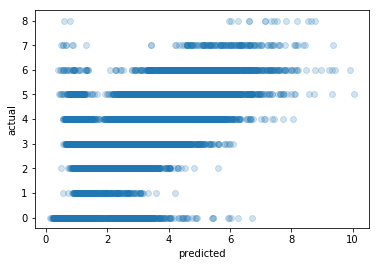

In [170]:
plt.scatter(preds, y, alpha = .2)
plt.ylabel("actual")
plt.xlabel("predicted")

Whats interesting about this graph is that it is very symmetrical. Our guesses seem to be off the same amount whether the prediction is 0 or 8.

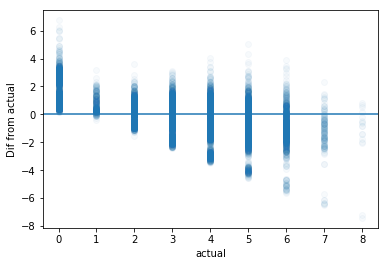

In [171]:
%matplotlib inline
plt.scatter(y, preds- y, alpha = .03)
plt.ylabel("Dif from actual")
plt.xlabel("actual")
plt.axhline()

Although it isn't  symmetrical, we aren't underpredicting the high values as much. 

I think this model is slightly worse than model 3 though because the variance of predicting the rows with 0 is greater. It is true that our rmse is less but I feel like it is worse that there is a greater chance we will be predicting wines that actually sold 0 cases sold as > 6 sold.

In [214]:
model4 = fit_regularized

#### Model 5

Now let's use a negative binomial. We might expect it to do slightly worse because here the mean and variance are not very far apart. 

In [215]:
df.TARGET.mean()

3.0290738569753812

In [216]:
df.TARGET.var()

3.710894522839082

In [217]:
import pandas as pd 
import statsmodels.api as sm 
count_model = sm.GLM(y, sm.add_constant(x), family=sm.families.NegativeBinomial(sm.genmod.families.links.log)).fit()

In [218]:
count_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12778
Model Family:        NegativeBinomial   Df Model:                           16
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27743.
Date:                Sun, 28 Jun 2020   Deviance:                       6755.2
Time:                        10:13:16   Pearson chi2:                 3.97e+03
No. Iterations:                     7   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9965      0.147      6.790      0.000       0.709       1.284
INDEX                 -0.0049      0.036     -0.136      0.892      -0.076       0.066
FixedAcidity          -0.0250      0.088     -0.284      0.777      -0.198       0.148
VolatileAcidity       -0.2892      0.087     -3.341      0.001      -0.459      -0.120
CitricAcid             0.0626      0.086      0.726      0.468      -0.106       0.232
ResidualSugar          0.0378      0.085      0.443      0.658      -0.130       0.205
Chlorides             -0.1485      0.085     -1.744      0.081      -0.315       0.018
FreeSulfurDioxide      0.1897      0.085      2.232      0.026       0.023       0.356
TotalSulfurDioxide     0.2427      0.087      2.776      0.005       0.071       0.414
Density               -0.0665      0.083     -0.799      0.424      -0.230       0.097
pH                    -0.1530      0.089     -1.729      0.084      -0.327       0.020
Sulphates             -0.1427      0.087     -1.641      0.101      -0.313       0.028
Alcohol                0.0370      0.090      0.410      0.682      -0.140       0.214
LabelAppeal            0.1186      0.012      9.657      0.000       0.094       0.143
AcidIndex             -1.5130      0.113    -13.356      0.000      -1.735      -1.291
STARS                  1.4616      0.037     39.287      0.000       1.389       1.535
AcidToSugarRatio    9.369e-05      0.000      0.390      0.696      -0.000       0.001
======================================================================================
"""

The log likelihood is bigger for this model. As we saw in model 1, training our model on more features makes the weights of our features smaller. We see again STARS and AcidIndex having the most weight. 

In [219]:
preds = count_model.predict(sm.add_constant(x))


In [220]:
metrics.r2_score(y,preds)

0.4043469827611874

This r2 score is a lot lower than the previous models. 

In [221]:
np.sqrt(metrics.mean_squared_error(y,preds))

1.4866851595984953

Our mse is higher too. These 2 facts make this model seem worse. 

Text(0.5, 0, 'predicted')

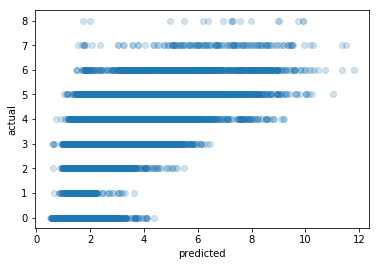

In [222]:
plt.scatter(preds, y, alpha = .2)
plt.ylabel("actual")
plt.xlabel("predicted")

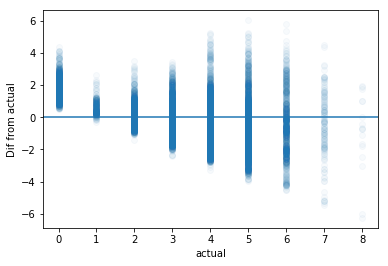

In [223]:
%matplotlib inline
plt.scatter(y, preds- y, alpha = .03)
plt.ylabel("Dif from actual")
plt.xlabel("actual")
plt.axhline()

In spite of the fact that our deviations are larger and our r2 score is lower, the graphs above show that are predictions are more even around the line x = 0 showing that we aren't over or underpredicting values as much. The extreme values like x = 0 and x = 8 still are getting over predicted and underpredicted respectivly but that is only to be expected with a linear model.

In [224]:
model5 = count_model

### Model 6

Let's repeat this with only the significant columns.

In [183]:
count_model = sm.GLM(y, sm.add_constant(x[sigCols]), family=sm.families.NegativeBinomial(sm.genmod.families.links.log)).fit()

In [184]:
preds = count_model.predict(sm.add_constant(x[sigCols]))
count_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                12795
Model:                            GLM   Df Residuals:                    12787
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27747.
Date:                Sun, 28 Jun 2020   Deviance:                       6762.7
Time:                        10:08:17   Pearson chi2:                 3.97e+03
No. Iterations:                     7   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8732      0.094      9.263      0.000       0.688       1.058
STARS                  1.4643      0.037     39.465      0.000       1.392       1.537
AcidIndex             -1.5102      0.111    -13.587      0.000      -1.728      -1.292
LabelAppeal            0.1182      0.012      9.636      0.000       0.094       0.142
FreeSulfurDioxide      0.1874      0.085      2.207      0.027       0.021       0.354
TotalSulfurDioxide     0.2435      0.087      2.788      0.005       0.072       0.415
Chlorides             -0.1494      0.085     -1.756      0.079      -0.316       0.017
VolatileAcidity       -0.2920      0.087     -3.375      0.001      -0.462      -0.122
======================================================================================
"""

Our coefficients are very close to the coefficients we saw with the poisson model. They have a slightly higher magnitude. 

In [185]:
metrics.r2_score(y,preds)

0.40553261161220866

In [186]:
np.sqrt(metrics.mean_squared_error(y,preds))

1.4852048222468577

In [187]:
model6 = count_model

Our r2 score and mse are almost identical to model 4. This is telling us that most of our features aren't adding anything to the model. 

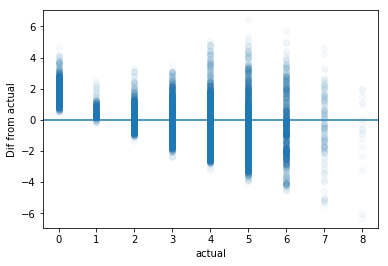

In [188]:
%matplotlib inline
plt.scatter(y, preds- y, alpha = .03)
plt.ylabel("Dif from actual")
plt.xlabel("actual")
plt.axhline()

Our residual plot also looks the same.

#### Model 7 

Since our previous models are underfitting the data, we could try adding more features using polynomial regression. This should help us explain more of the variance thereby lowering our r2 score.

Let's choose a 3rd degree since higher than that may lead to overfitting and will be a lot slower.

In [189]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x[sigCols])
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [190]:
preds = pol_reg.predict(poly_reg.fit_transform(x[sigCols]))

In [191]:
metrics.r2_score(y,preds)

0.5817909841348062

In [192]:
metrics.r2_score(y,preds)

0.5817909841348062

In [193]:
np.sqrt(metrics.mean_squared_error(preds,y))

1.2457159606028512

Our mean squared errors and r2 scores are better after doing this...
But we should see if this will be true if we try to cross validate.

In [194]:
from sklearn.model_selection import cross_val_score
m1scores = cross_val_score(pol_reg, x, y, cv=5, scoring='neg_mean_squared_error')
m1scores

array([-1.78505867, -1.83983763, -1.78239341, -1.76563657, -1.716997  ])

All our mses are close together but let's calculare the average rmse.

In [195]:
np.sqrt(m1scores.mean() * -1)

1.3334109098418554

It is higher but only slightly, so we aren't overfitting the data that much

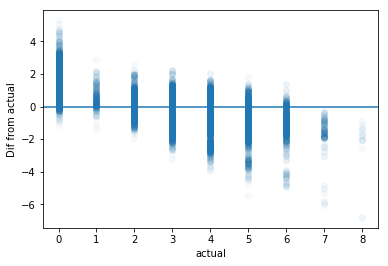

In [196]:
%matplotlib inline
plt.scatter(y, preds- y, alpha = .03)
plt.ylabel("Dif from actual")
plt.xlabel("actual")
plt.axhline()

We see though that we are underpredicting the high values again though. Adding polynomial terms does not seem to be the way to go with this. 

In [231]:
model7 = pol_reg

### Model Comparison summary.

Our main metric we should use is rmse. This metric directly tells us how far off our predictions are on avg. We should also use r2 score since ideally, we would be explaining most of the variance.


Although, we have been doing this above, we will consolidate our findings here... We will be referencing the graphs we made above in each Model subsection.

Model 1 - We should not be using this model. This is a simple regression model that uses all the features. The problem with this model is that we do not need all of the features to get the same results. This makes it harder to interpret the coefficients.

Model 2 - This is our linear model. It had a rmse of 1.32 and an r2 of .526. One big problem we find in this model is that it is predicting negative values which practically does not make sense and is underpredicting the values which sold 7 or 8 cases significantly. Because of this I do not think it is a good choice to use as the model.

Model 3- This was a poisson model. Our mse was slightly higher for this model at 1.4 and its r2 was lower at around .46. It's predictions for low values were good but it had high variance when the actual value was around 4 or 5 and like model 2 underpredicted high values. 

Model 4 - This was our zero inflated poisson. Our mse for this model was the lowest at 1.31 and the r2 was .53. We also saw that this graph was more symmetrical in giving predictions, except at the extreme values where the true number of cases sold was 0 -1 or 7-8. 

Model 5 - This was our negative binomial. We were able to create an almost identical model with less features so we shouldn't consider this one. 

Model 6 - This was the negative binomial with only the significant features. Its r2 score was lower than the poisson at .404 and its mse was 1.48. It's residual graph was similar to the poisson just there was more variance in predicting the values where the number of wines sold was around 4 or 5. 

Model7 - This was our polynomial model. Although this model had the lowest mse, it also required making over 100 features that make it harder to interpret the graph. Because of this, I wouldn't consider this model. 

With this our choices are between model 3, 4, and 6

Since my primary metric is r2 and mse I eliminated model 6 as it has the highest mse. 

Model 3's log likelihood is -23343 and 4 is -20625. Log likelihood tells us how good the model fits the underlying data. At the same time the inflation variables are harder to explain. Also, as mentioned, the variance for predicting rows that sold 0 cases is too high for the 4th model. I therefore think the 3rd model should be used.

We should use cross validation to see how our model will do on new data. 

In order to use sklearn cross val function, we need a class that implements a fit and predict method...

In [232]:
import statsmodels.api as sm
from sklearn.base import BaseEstimator, RegressorMixin

class PoissonWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self):
        pass
    def fit(self, X, y):
        self.model_ = sm.GLM(y, sm.add_constant(X[sigCols]), family=sm.families.Poisson(sm.genmod.families.links.log))
        self.results_ = self.model_.fit()
    def predict(self, X):
        return self.results_.predict(sm.add_constant(X[sigCols]))

In [233]:
from sklearn.model_selection import cross_val_score
m = PoissonWrapper()
cvScore = cross_val_score(m, x, y, cv = 5, scoring = 'neg_mean_squared_error')
cvScore

array([-0.64297649, -0.68991407, -0.66662007, -0.64270248, -0.65737137])

In [234]:
np.sqrt(cvScore.mean() * -1)

0.8123526925840063

Our cross val score is very close to our rmse from old data. Because of this is okay to use it. 

Our coefficients also make intuitive sense. The higher the acid index, the more tart the wine tastes and too much tartness makes it so that less people will buy it. Also, STARS make sense since the higher the rating, the more cases will sell. 

Note: I think that RMSE is an acceptable although not perfect measure to use here. It is good because it helps tell us on average how far off each prediction is. This metric doesn't per say help us know if the model if giving too low values for high numbers. We were however able to show that model 3 handles this better than some of our other models. with this graph.

In [235]:
m.fit(x,y)
preds = m.predict(x)

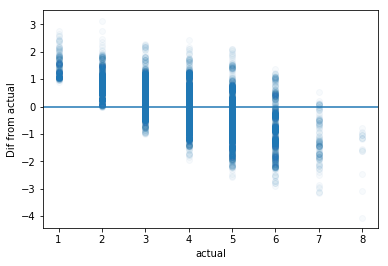

In [236]:
%matplotlib inline
plt.scatter(y, preds- y, alpha = .03)
plt.ylabel("Dif from actual")
plt.xlabel("actual")
plt.axhline()

We are clearly predicting values that are too high for when the true value is 0 or 1. I was hoping that the logistic regression model would help with this but we saw that the logistic regression model does not perform well,=. The rest of the values though are spread out around equally on either side of the x axis. 

### Evaluating the test data

In [237]:
username = 'cohenb51'
path = 'Katz_School/develop/DAV6150/Project1_Eval.csv'
test = pd.read_csv(f'https://raw.githubusercontent.com/{username}/{path}')

Now we need our test data to undergo the same transformations. 

In [238]:
scaler = MinMaxScaler(copy=True)
cleaningTest = pd.DataFrame(scaler.fit_transform(test), columns = test.columns)
cleaningTest.STARS = cleaningTest.STARS 

C:\Users\b-coh\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\b-coh\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [239]:
counts = test.isnull().sum(axis=0)/len(df)
imputeWithMedianThreshold = .11

for col, percentNull in counts.iteritems():
    if percentNull <= imputeWithMedianThreshold and percentNull > 0:
        med = test[col].median()
        print(col, med)
        nulls = cleaningDf3[cleaningDf3[col].isnull()]
        cleaningTest.loc[nulls.index, col] = med
        

ResidualSugar 3.6
Chlorides 0.047
FreeSulfurDioxide 30.0
TotalSulfurDioxide 124.0
pH 3.21
Sulphates 0.5
Alcohol 10.4
STARS 2.0


In [240]:
nulls = cleaningTest[cleaningDf3.STARS.isnull()]
cleaningTest.loc[nulls.index, 'STARS'] = 0

C:\Users\b-coh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


We saw that the new variables we made don't help our model so we can leave them out.

In [241]:
x_test = cleaningTest[sigColumns]

In [242]:
#finalPreds = model3.predict(x_test[sigCols], exog_infl = x_test[sigCols] )
x_test['TARGET'] = model3.predict(sm.add_constant(x_test[sigColumns]))

C:\Users\b-coh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


We aren't given the actual results, but we can see if our correltions are the same.

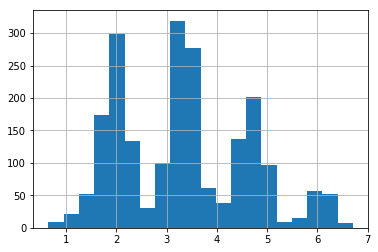

In [243]:
x_test.TARGET.hist(bins = 20)

We see that our distribution of the target variable is different. This isn't such a good sign since we see very few values predicted above 5. We have fractions which is okay since we can still round fractional amounts to get an idea of how many cases will be sold. If we bin all the ones between 0 and 1 to zero then our distribution more resembles our original one.

Also, nothing persay implies that our distribution of our test data has to match our training data. 

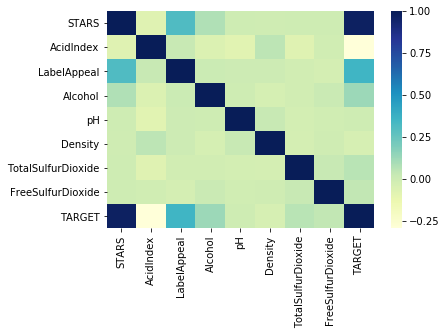

In [244]:
corr = x_test.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu")

We see the same strong correlations here s we did above with stars and target appeal. This adds credibility to our model. 

At the same time though, we should be wary that our model may be over predicting some of the low values and underfitting some of the high values as we saw earlier.

Conclusions.

1. We created a model that can predict the number of cases of wines sold within 1.4 of the true value on average.
2. We saw that although linear models to tend to slightly overestimate low values and underestimate high values, using polynomial models or logistic regression models to help does not always work to help solve this.  

As a practical measure, we should consider binning the predictions into groups low, middle, and high. This will help mitigate the fact that we are over/underpredicting slightly.  